In [1]:
"""
Project 자동차 리콜 데이터 분석

● 프로젝트 목표
- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

● 프로젝트 목차

1. 데이터 읽기 : 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인
   1.1. 데이터 불러오기

2. 데이터 정제 : 결측치 확인 및 기초적인 데이터 변형
   2.1. 결측치 확인
   2.2. 중복값 확인
   2.3. 기초적인 데이터 변형

3. 데이터 시각화 : 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고
   시각화를 통하여 데이터의 특성 파악
   3.1. 제조사별 리콜 현황 출력
   3.2. 모델별 리콜 현황 출력
   3.3. 월별 리콜 현황 출력
   3.4. 생산연도별 리콜 현황 출력
   3.5. 4분기 제조사별 리콜 현황 출력
   3.6. 하반기 생산연도별 리콜 현황 출력
   3.7. 워드 클라우드를 이용한 리콜 사유 시각화

● 데이터 출처
  https://www.data.go.kr/data/3048950/fileData.do
  
● 프로젝트 개요
리콜(recall)은 제품의 설계, 제조 단계에서 결함이 발견되었을 시 문제 예방의 차원에서
판매자가 무상으로 수리, 점검 및 교환을 해주는 소비자 보호 제도.

이번 프로젝트에서는 한국교통안전공단에서 제공한 2020년 자동차 결함 리콜 데이터를 활용하여
유의미한 패턴 및 인사이트를 발굴하고 시각화하는 실습 진행
"""

'\nProject 자동차 리콜 데이터 분석\n\n● 프로젝트 목표\n- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출\n- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습\n\n● 프로젝트 목차\n\n1. 데이터 읽기 : 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인\n   1.1. 데이터 불러오기\n\n2. 데이터 정제 : 결측치 확인 및 기초적인 데이터 변형\n   2.1. 결측치 확인\n   2.2. 중복값 확인\n   2.3. 기초적인 데이터 변형\n\n3. 데이터 시각화 : 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고\n   시각화를 통하여 데이터의 특성 파악\n   3.1. 제조사별 리콜 현황 출력\n   3.2. 모델별 리콜 현황 출력\n   3.3. 월별 리콜 현황 출력\n   3.4. 생산연도별 리콜 현황 출력\n   3.5. 4분기 제조사별 리콜 현황 출력\n   3.6. 하반기 생산연도별 리콜 현황 출력\n   3.7. 워드 클라우드를 이용한 리콜 사유 시각화\n\n● 데이터 출처\n  https://www.data.go.kr/data/3048950/fileData.do\n  \n● 프로젝트 개요\n리콜(recall)은 제품의 설계, 제조 단계에서 결함이 발견되었을 시 문제 예방의 차원에서\n판매자가 무상으로 수리, 점검 및 교환을 해주는 소비자 보호 제도.\n\n이번 프로젝트에서는 한국교통안전공단에서 제공한 2020년 자동차 결함 리콜 데이터를 활용하여\n유의미한 패턴 및 인사이트를 발굴하고 시각화하는 실습 진행\n'

In [2]:
### 1. 데이터 읽기

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
rc_df = pd.read_csv('./Recall_data.csv', encoding = 'utf-8')
rc_df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [4]:
rc_df.tail()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274,한국닛산(주),INFINITI Q70 5.6,2014-04-08,2014-04-08,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [5]:
rc_df.info()
# 6개 컬럼

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1275 non-null   object
 1   차명        1275 non-null   object
 2   생산기간(부터)  1275 non-null   object
 3   생산기간(까지)  1275 non-null   object
 4   리콜개시일     1275 non-null   object
 5   리콜사유      1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


In [6]:
### 2. 데이터 정제

## 2.1. 결측치 확인

# 한글 폰트 처리
plt.rc('font', family='Malgun Gothic')     # 윈도우, 구글 콜랩
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 처리 종료

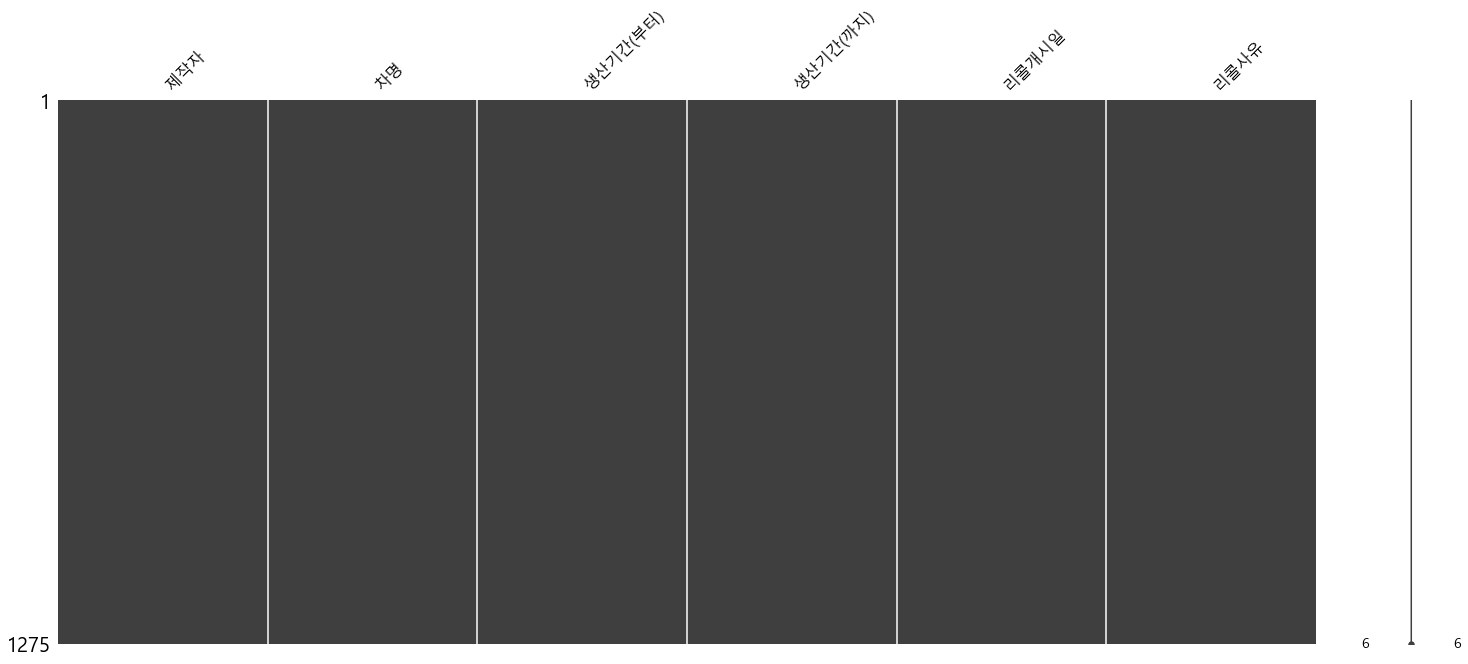

In [7]:
# 결측치 시각화
msno.matrix(rc_df) # 결측치 시각화 함수
plt.show()

In [8]:
# 열별 결측치 갯수 반환 (True : 1, False : 0)
rc_df.isna().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [9]:
## 2.2. 중복값 확인

rc_df[rc_df.duplicated(keep=False)]
print("Before :", len(rc_df))
rc_df = rc_df.drop_duplicates()
print("After :", len(rc_df))

Before : 1275
After : 1274


In [10]:
## 2.3. 기초데이터 변형

# 생산 기간 → 연, 월, 일 : 정수형
# 생산 기간 분리 함수
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

In [11]:
rc_df['start_year'] = rc_df['생산기간(부터)'].apply(parse_year)
rc_df['start_month'] = rc_df['생산기간(부터)'].apply(parse_month)
rc_df['start_day'] = rc_df['생산기간(부터)'].apply(parse_day)

In [12]:
rc_df['end_year'] = rc_df['생산기간(까지)'].apply(parse_year)
rc_df['end_month'] = rc_df['생산기간(까지)'].apply(parse_month)
rc_df['end_day'] = rc_df['생산기간(까지)'].apply(parse_day)

In [13]:
rc_df['recall_year'] = rc_df['리콜개시일'].apply(parse_year)
rc_df['recall_month'] = rc_df['리콜개시일'].apply(parse_month)
rc_df['recall_day'] = rc_df['리콜개시일'].apply(parse_day)

In [14]:
rc_df

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,9,6,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,9,4,2020,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,6,28,2020,12,28
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,6,23,2020,12,28
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,11,23,2020,12,28


In [15]:
# 불필요 열 삭재 / 한글 → 영어
rc_df = rc_df.drop(columns=['생산기간(부터)', '생산기간(까지)', '리콜개시일']).rename(columns={'제작자':'manufacturer', '차명':'model', '리콜사유':'cause'})

In [16]:
rc_df

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23
3,한국토요타자동차(주),토요타 캠리,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,9,6,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,9,4,2020,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1271,한국닛산(주),INFINITI M30d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,6,28,2020,12,28
1272,한국닛산(주),INFINITI Q70 3.0d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,6,23,2020,12,28
1273,한국닛산(주),INFINITI M56,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,11,23,2020,12,28


In [17]:
print(rc_df[rc_df['recall_year']==2021])

Empty DataFrame
Columns: [manufacturer, model, cause, start_year, start_month, start_day, end_year, end_month, end_day, recall_year, recall_month, recall_day]
Index: []


In [18]:
# 2021년 데이터가 없으므로 2020년 데이터 대상으로 분석 실시
print(rc_df[rc_df['recall_year']==2020])

     manufacturer              model  \
0        (주)에프엠케이             기블리 디젤   
1        (주)에프엠케이          콰트로포르테 디젤   
2     한국토요타자동차(주)           토요타 프리우스   
3     한국토요타자동차(주)             토요타 캠리   
4     한국토요타자동차(주)       토요타 캠리 하이브리드   
...           ...                ...   
1270      한국닛산(주)       INFINITI M30   
1271      한국닛산(주)      INFINITI M30d   
1272      한국닛산(주)  INFINITI Q70 3.0d   
1273      한국닛산(주)       INFINITI M56   
1274      한국닛산(주)   INFINITI Q70 5.6   

                                                  cause  start_year  \
0     스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...        2014   
1     스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...        2014   
2     콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...        2019   
3     뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...        2019   
4     뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...        2019   
...                                                 ...         ...   
1270                  

In [19]:
rc_df = rc_df[rc_df['recall_year']==2020]

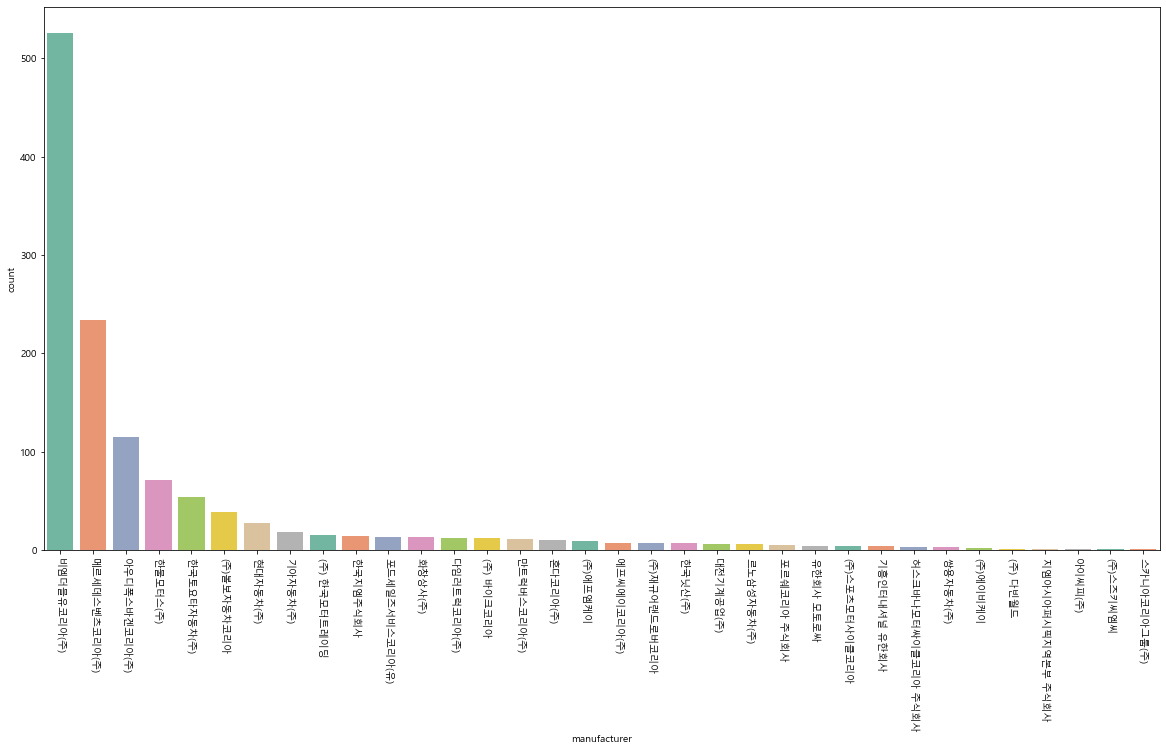

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '한불모터스(주)',
       '한국토요타자동차(주)', '(주)볼보자동차코리아', '현대자동차(주)', '기아자동차(주)', '(주) 한국모터트레이딩',
       '한국지엠주식회사', '포드세일즈서비스코리아(유)', '화창상사(주)', '다임러트럭코리아(주)', '(주) 바이크코리아',
       '만트럭버스코리아(주)', '혼다코리아(주)', '(주)에프엠케이', '에프씨에이코리아(주)', '(주)재규어랜드로버코리아',
       '한국닛산(주)', '대전기계공업(주)', '르노삼성자동차(주)', '포르쉐코리아 주식회사', '유한회사 모토로싸',
       '(주)스포츠모터사이클코리아', '기흥인터내셔널 유한회사', '허스크바나모터싸이클코리아 주식회사', '쌍용자동차(주)',
       '(주)에이비케이', '(주) 다빈월드', '지엠아시아퍼시픽지역본부 주식회사', '아이씨피(주)', '(주)스즈키씨엠씨',
       '스카니아코리아그룹(주)'],
      dtype='object', name='manufacturer')

In [20]:
### 3. 데이터 시각화

## 3.1. 제조사별 리콜 현황 그래프

rc_df.groupby("manufacturer").count()['model'].sort_values(ascending=False)
rc_bar = pd.DataFrame(rc_df.groupby("manufacturer").count()['model'].sort_values(ascending=False)).rename(columns={'model':'count'})
plt.figure(figsize=(20, 10))
ax = sns.countplot(x = 'manufacturer', data=rc_df, palette='Set2', order=rc_bar.index)
plt.xticks(rotation=270)
plt.show()
rc_bar.index

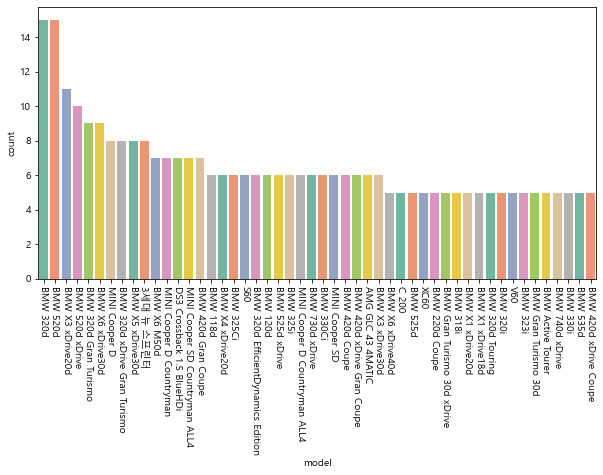

In [21]:
## 3.2. 모델별 리콜 현황 그래프

pd.DataFrame(rc_df.groupby('model').count()['start_year'].sort_values(ascending = False)).rename(columns={'model':'count'}).head(50)
rc_bar = pd.DataFrame(rc_df.groupby('model').count()['manufacturer'].sort_values(ascending = False)).rename(columns={'manufacturer':'count'}).iloc[:50]
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model', data = rc_df[rc_df.model.isin(rc_bar.index)], palette="Set2", order = rc_bar.index)
plt.xticks(rotation=270)
plt.show()

In [29]:
## 3.3. 월별 리콜 현황 출력

pd.DataFrame(rc_df.groupby('recall_month').count()['start_year'].sort_values(ascending=False)).rename(columns={'start_year':'count'})
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

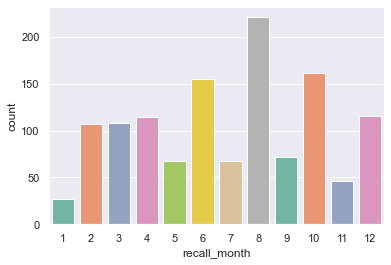

In [31]:
sns.set(style='darkgrid')
ax = sns.countplot(x="recall_month", data=rc_df, palette="Set2")
plt.show()

In [33]:
## 3.4. 연도별 리콜 현황 그래프 (라인 그래프)

rc_line = pd.DataFrame(rc_df.groupby('start_year').count()['model']).rename(columns={'model':'count'}).reset_index()
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

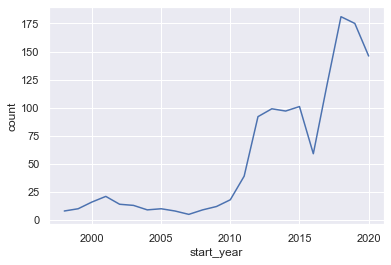

,start_year,count
0,1998,8
1,1999,10
2,2000,16
3,2001,21
4,2002,14
5,2003,13
6,2004,9
7,2005,10
8,2006,8
9,2007,5


In [34]:
sns.set(style='darkgrid')
sns.lineplot(data=rc_line, x='start_year', y='count')
plt.show()
rc_line

In [35]:
## Q1. 2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)

rc_count = pd.DataFrame(rc_df.groupby('recall_month').count()['start_year'].sort_values(ascending=False)).rename(columns={'start_year' : 'count'})
rc_count.iloc[0]['count'] - rc_count.iloc[-1]['count']

194

In [36]:
## 3.5. 2020년 4분기 제조사별 리콜 현황 그래프

rc_df[rc_df.recall_month.isin([10, 11, 12])].head()
# isin 이라는 논리연산을 이용하여 조건에 맞는 데이터 출력 가능

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
447,비엠더블유코리아(주),BMW 320d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,28,2015,6,30,2020,10,1
451,비엠더블유코리아(주),BMW 320d EfficientDynamics Edition,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2011,11,8,2015,6,29,2020,10,1
455,비엠더블유코리아(주),BMW 320d Gran Turismo,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,26,2015,5,21,2020,10,1


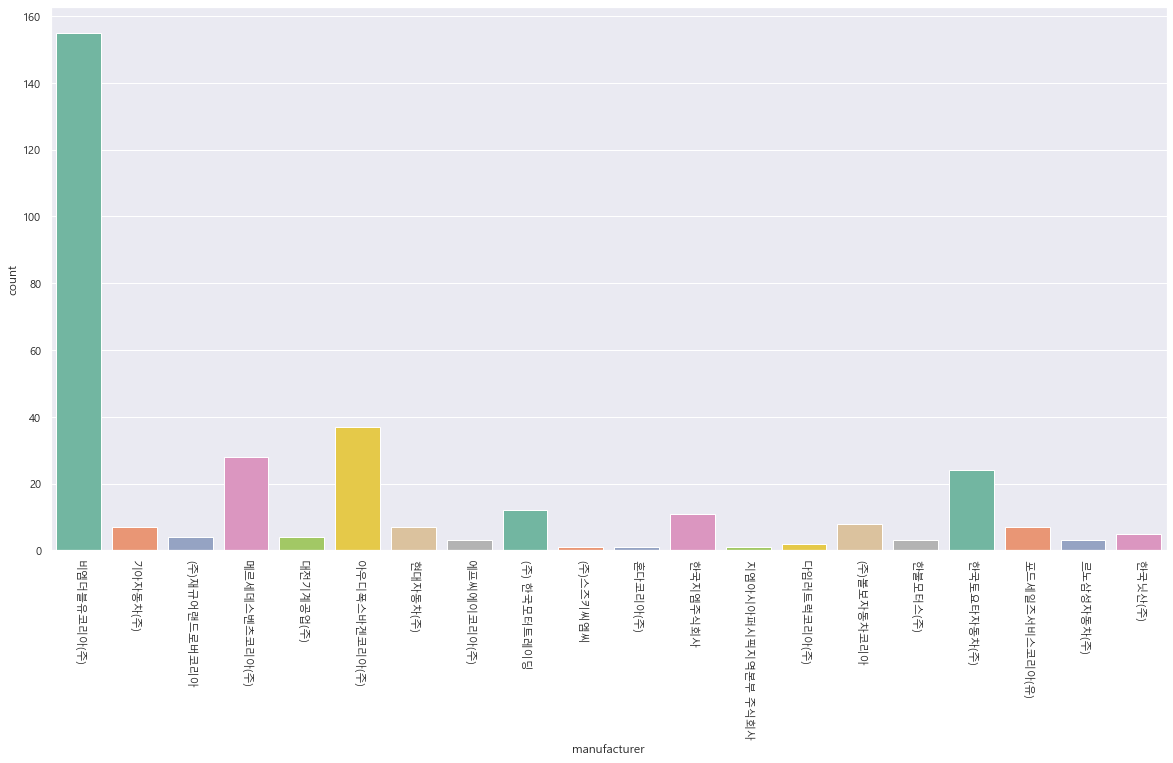

In [40]:
plt.figure(figsize=(20,10))
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid') # 한글 깨짐 처리
ax = sns.countplot(x='manufacturer', data=rc_df[rc_df.recall_month.isin([10, 11, 12])], palette="Set2")
plt.xticks(rotation=270)
plt.show()

In [41]:
## 3.6. 하반기 생산연도별 리콜 현황 그래프 (7~12월)

rc_df[rc_df.recall_month>=7].head()
# 해당하는 column을 지정하여 Series 형태로 출력 가능

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
437,비엠더블유코리아(주),BMW 118d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,2,2019,4,29,2020,8,1
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
441,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,13,2015,4,15,2020,8,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
445,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2014,10,16,2015,2,25,2020,8,1


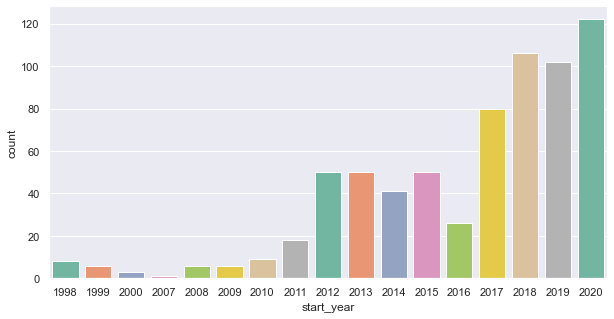

In [42]:
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
ax = sns.countplot(x='start_year', data=rc_df[rc_df.recall_month>=7], palette="Set2")
plt.show()

In [43]:
## 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

try:
    from wordcloud import WordCloud, STOPWORDS
except:
    ! pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS

# 문법과 관련된 내용을 배제하기 위해 STOPWORDS 따로 저장

In [44]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [45]:
# 직접 리콜 사유와 관련이 적은 문법적 어구들을 입력하여 배제
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [46]:
# 리콜 사유에 해당하는 열의 값들을 중복 제거한 다음 모두 이어붙여서 text라는 문자열로 저장
text = ""

for word in rc_df.cause.drop_duplicates():
    text += word
    
text[:100]

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전'

In [54]:
# 한글 사용을 위한 폰트 지정
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='C:\/windows/fonts/Malgun.ttf',
                background_color='white', width=800, height=800)

In [55]:
wc1.generate(text)

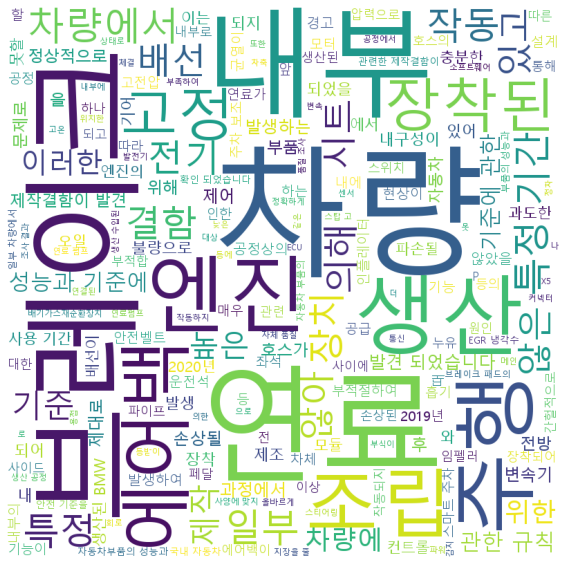

In [56]:
plt.figure(figsize=(10,8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [57]:
## Q2. 기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명

rc_df[rc_df['manufacturer']=='기아자동차(주)'].sort_values(by=['recall_year', 'recall_month', 'recall_day'], ascending = False).iloc[0]['model']

'쏘울(SK3) EV'